# **FoodHub Data Analysis**


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [65]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding the structure of the data

In [66]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [67]:
# read the data
data = pd.read_csv('/kaggle/input/food-ordering-and-delivery-app-dataset/food_order.csv')
# copying data to another variable to avoid any changes to original data
df = data.copy()
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [68]:
df.shape

(1898, 9)

#### Observations:
The dataset has 1898 rows and 9 columns.


In [69]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The dataset has 1 float,4 integer and 4 object datatypes.


In [70]:
# checking missing values across each columns
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in the rows for each column in the dataset.


In [71]:
#configure pandas to display floating-point numbers in the specified format (two decimal places) throughout the session.
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Checking the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:

* The cost of food order ranges between 4 dollars to 35 dollars.
* It takes minimum of 20 min and maximum of 30 min to prepare the food with 27 min as average food preparation time.
* The delivery time ranges between 5min to 33 min.
* TThe average food delivery time is ~25 min.  







In [72]:
# Obtaining the unique values from the rating series
df['rating'].unique()
# Obtaining the not rated order counts from the rating series
df['rating'].value_counts()['Not given']

736

#### Observations:There are 736 orders that are not rated by the customers.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

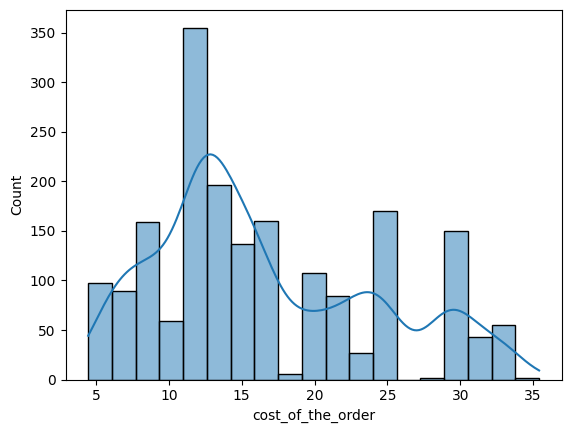

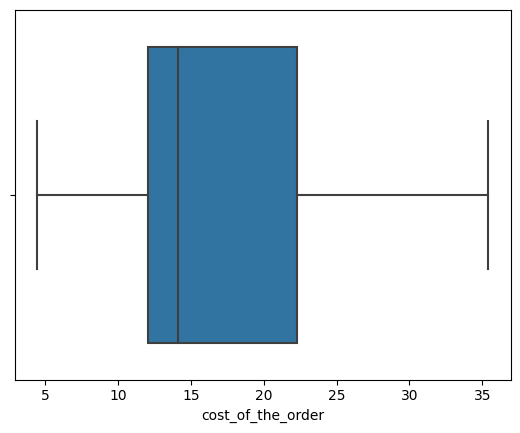

In [73]:
# Analysis on the numerical variables
# Visualising the distribution on cost of the order
sns.histplot(data=df,x='cost_of_the_order',kde=True);
plt.show()
sns.boxplot(data=df,x='cost_of_the_order');
plt.show()

#### Observations:

* The distribution is right skewed as customers prefer lower cost foods while placing the order.
* 75% of the orders are lower than $23.


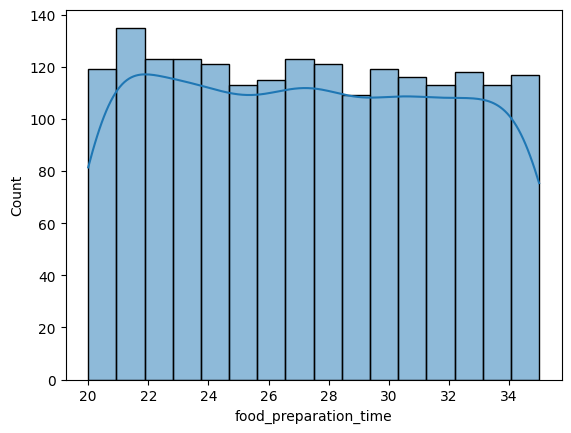

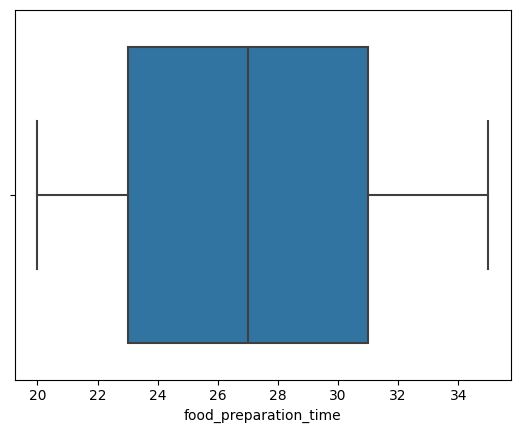

In [74]:
#Visualising the distribution of food preparation time
sns.histplot(data=df,x='food_preparation_time',kde=True,bins=16);
plt.show()
sns.boxplot(data=df,x='food_preparation_time');
plt.show()

#### Observations:

*  Food preparation time is normally distributed with mean and the median almost the same.
*  The minimum food preparation time is 20 min and the maximum preparation time is 35 min.



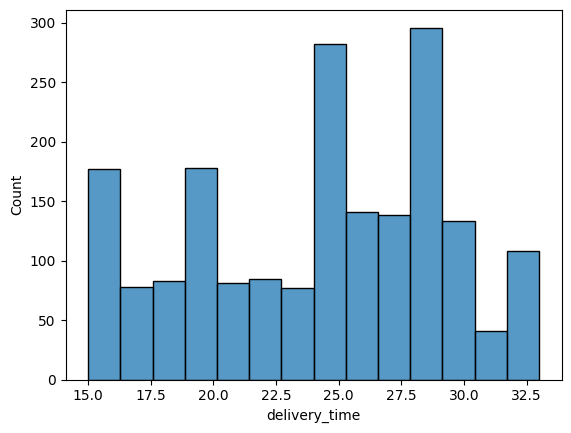

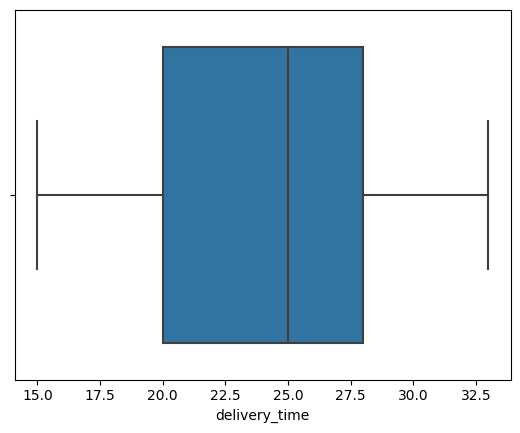

In [75]:
#Visualising the distribution of delivery time
sns.histplot(data=df,x='delivery_time');
plt.show()
sns.boxplot(data=df,x='delivery_time');
plt.show()

####Observations:
*   The distribution is left skewed with no outliers.
*   The minimum time taken to devliver the food is around 15min and maximum delivery time is 33min.
*  In most occurances the food delivery time is 25min.
*  75% of the food orders are delivered less than 28 min.





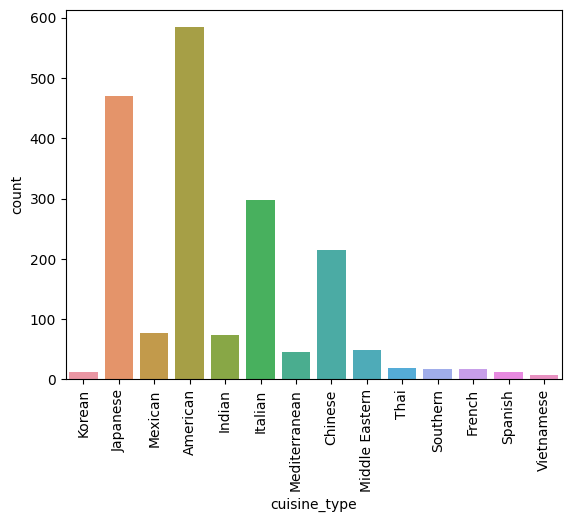

In [76]:
# Analysis on the categorical variables
# Visualising the distribution on the cuisine type
sns.countplot(data=df,x='cuisine_type');
plt.xticks(rotation=90);
plt.show();

####Observations:
*   American cuisine is mostly preferred by the customers followed by Japanese,Italian and Chinese cuisine.
*  Vietnamese cuisine is least preferred by customers.



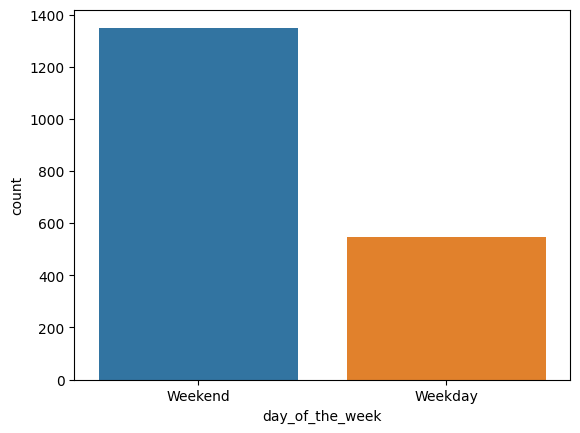

In [77]:
# Visualising the distribution on the days
sns.countplot(data=df,x='day_of_the_week');
plt.show();

####Observation:
The number of food orders are higher on weekend than week days.

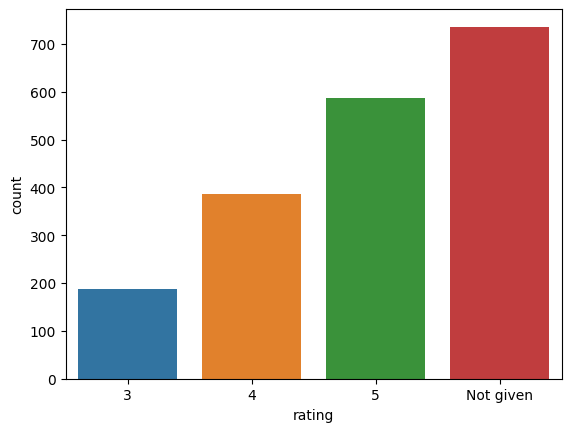

In [78]:
# Visualising the distribution on the rating
sns.countplot(data=df.sort_values('rating'),x='rating');
plt.show();

####Observation:

*   The orders are given rating of 5,4,3 and 'Not given'.
*   Most of the oders are unrated.



In [79]:
# Obtaining the top 5 restaurants based on the order_id
df.groupby(['restaurant_name']).count()[['order_id']].sort_values('order_id',ascending=False).reset_index().head(5)


,restaurant_name,order_id
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:
The top 5 restaurants in terms of the number of orders received are :
* Shake Shack
* The Meatball Shop
* Blue Ribbon Sushi
* Blue Ribbon Fried Chicken
* Parm








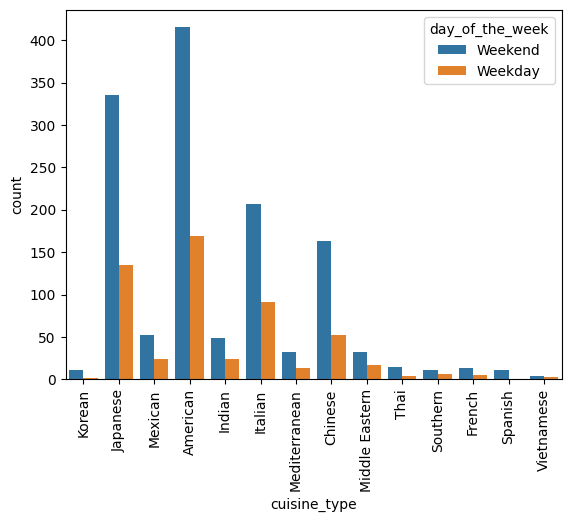

In [80]:
#Analysing which cuisine is popular on weekends
sns.countplot(data=df,x='cuisine_type',hue='day_of_the_week');
plt.xticks(rotation=90);
plt.show();

In [81]:
#Obtaining the most popular cuisine on weekend
weekend_cuisine=df[df['day_of_the_week']=="Weekend"]#This boolean mask filters the DataFrame, selecting only the rows where the day of the week is a weekend.
weekend_cuisine.groupby(['cuisine_type']).count()[['order_id']].sort_values('order_id',ascending=False).head(1)# This DataFrame shows the cuisine types and the number of orders for each type, sorted in descending order of order count.

,order_id
cuisine_type,
American,415


#### Observations:
* The most popular cuisine on weekends is the American cuisine based on our count plot.
* On the weekends American cuisine is ordered 415 times.




In [82]:
#Calculating the percentage of rows where the orders cost more than $20
percentage = (len(df[df['cost_of_the_order'] > 20]) / len(df)) * 100
round(percentage,2)

29.24

#### Observations:
The percentage of the orders that cost more than 20 dollars is 29.24%.




In [83]:
# Calculating the mean order delivery time using mean function
round(df['delivery_time'].mean(),2)

24.16

#### Observations:
The mean order delivery time is 24.16 minutes.

In [84]:
# Obtaining frequent customer id and number of orders placed
frequent_customers = df['customer_id'].value_counts().reset_index().head(3)#Obtaining the most frequent customer ids
frequent_customers.columns=['customer_id','order_count']#Creating the columns customer_id and order count
frequent_customers

,customer_id,order_count
0,52832,13
1,47440,10
2,83287,9


#### Observations:
The following are the top 3 most frequent customer ids who will receive the 20% discount vouchers.
*   52832: 13 orders
*   47440: 10 orders
*   83287: 9 orders








### Multivariate Analysis

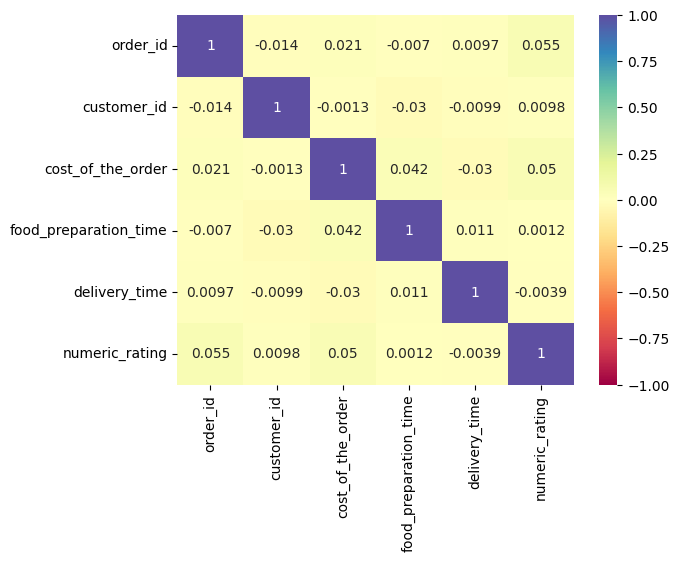

In [85]:
# Creating a numeric rating column by replacing 'Not given' with 0 in the 'rating' column and casting the int type
df['numeric_rating']=df['rating'].replace('Not given',0).astype(int)
#Analysing the correlation between the numeric variables using the seaborn heatmap
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Spectral',vmin=-1,vmax=1);

####Observation:

*   The heatmap shows a very week correlation between the variables.
*   Customer_id and order_id are just the unique identifiers









/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


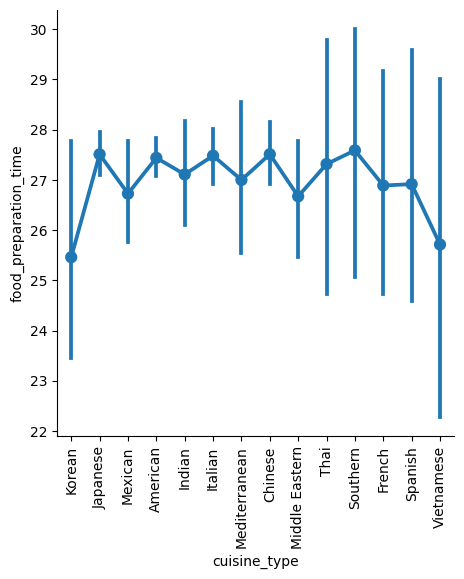

In [86]:
#Analysing the relationship between cuisine_type and food preparation time
sns.catplot(data=df,x='cuisine_type', y='food_preparation_time', kind='point')
plt.xticks(rotation=90);
plt.show()

####Observation:
*  The average of food preparation time is less than 28 min for all cuisine types.
* It takes mimimum 20 min and maximum 35 min to prepare food for most of the cuisine types.
* Korean cuisine is the fastest since it takes less time to prepare.
    




/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


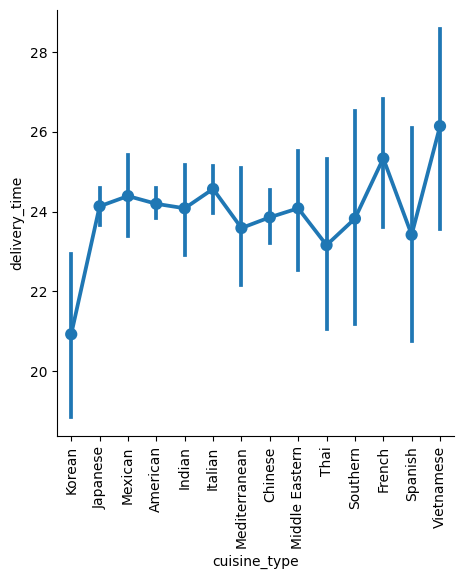

In [87]:
#Analysing the relationship between cuisine_type and delivery time
sns.catplot(data=df, x='cuisine_type',y='delivery_time', kind='point')
plt.xticks(rotation=90);
plt.show()

####Observation:
* The average of delivery time is between 24 - 27
minutes for most of the cuisine types.
* Korean cuisine is the fastest to deliver.

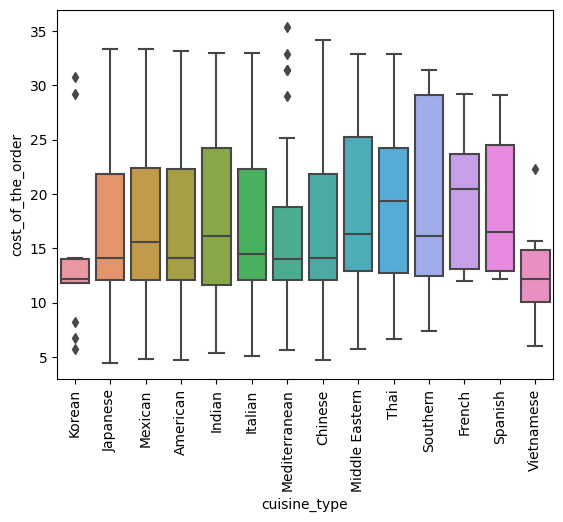

In [88]:
#Analysing the relationship between cuisine_type and cost of the order
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order');
plt.xticks(rotation=90);
plt.show();

####Observations:
* Average food order cost is less than $20 for all cusine types.
* Korean and Vietnamese cuisine are the cheapest.
* Mediterranean cuisine has the most expensive order.


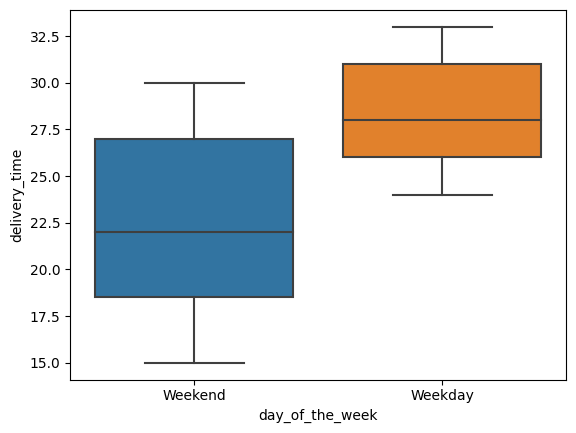

In [89]:
#Analysing the relationship between Day and Delivery time
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.show();

####Observation:
Weekend delivery is faster than delivery on other days may be due traffic congestion.

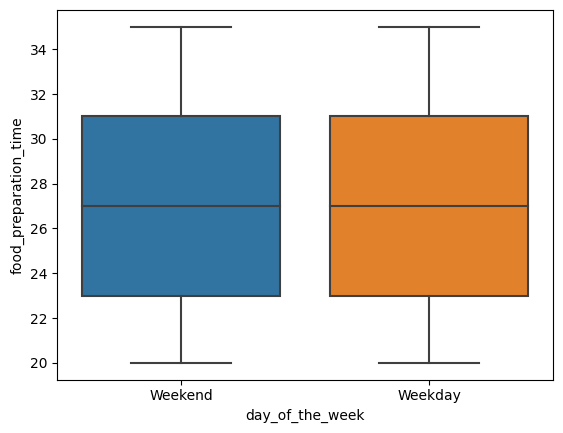

In [90]:
#Analysing the relationship between Day and food preparation time
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time')
plt.show();

####Observation:
The distribution of food preparation time remains same on the weekend and weekdays.


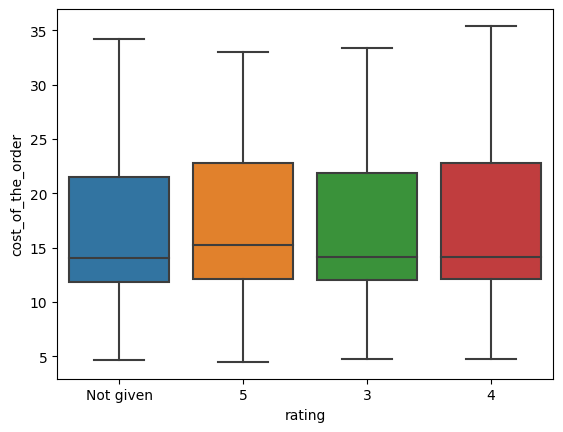

In [91]:
#Analysing the rating distribution with cost of the order
sns.boxplot(data=df, x='rating', y ='cost_of_the_order')
plt.yticks(rotation=0);
plt.show()

####Observation:
Cost of the order doesnot have any impact with the rating.


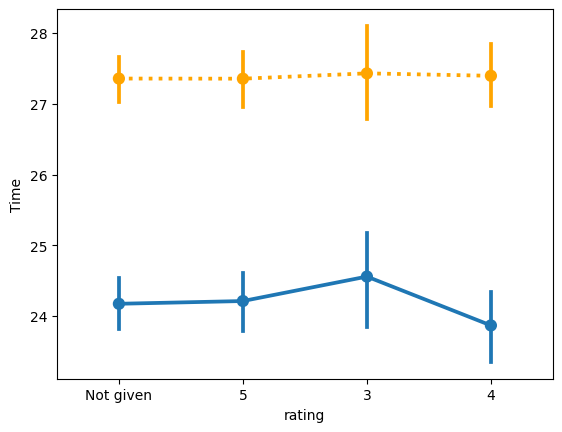

In [92]:
#Analysing how delivery and food preparation time affects the rating
sns.pointplot(data= df, x = 'rating', y = 'delivery_time')
sns.pointplot(data= df, x = 'rating', y = 'food_preparation_time', color = 'orange' ,linestyles= 'dotted')
plt.ylabel('Time')
plt.show()

####Observation:
The delivery time and food preparation time doesnot have any impact with the customer rating.

In [93]:
#Filter the rated restaurants
exc_not_rated=df[df['numeric_rating']!=0]
# Group by 'restaurant_name' and aggregate while renaming columns
rating_restaurant=exc_not_rated.groupby('restaurant_name').agg(
    total_rating=('numeric_rating', 'count'),
    average_rating=('numeric_rating', 'mean'))
# Obtaining the restaurants that have a rating count of more than 50 and the average rating greater than 4
rating_restaurant.loc[(rating_restaurant['total_rating'] > 50)
& (rating_restaurant['average_rating'] > 4)].reset_index()


,restaurant_name,total_rating,average_rating
0,Blue Ribbon Fried Chicken,64,4.33
1,Blue Ribbon Sushi,73,4.22
2,Shake Shack,133,4.28
3,The Meatball Shop,84,4.51


#### Observations:
The below 4 restaurants have total rating count of more than 50 and the average rating greater than 4

* Blue Ribbon Fried Chicken.
* Blue Ribbon Sushi.
* Shake Shack.
* The Meatball Shop.









In [94]:
# Define the revenue function
def revenue(i):
    if i > 20:
        i = i * 0.25
    elif i > 5:
        i = i * 0.15
    else:
        i = 0
    return i

# Apply the net_revenue function to the 'cost_of_the_order' column and store the result in a new 'revenue' column
df['revenue'] = df['cost_of_the_order'].apply(revenue)

# Calculating the net revenue
df['revenue'].sum()

6166.303

#### Observations:
The net revenue generated on all the orders is $6166.30 .


In [95]:
# Creating new column summing up delivery time and food preparation time
df['Total_time']=df['food_preparation_time']+df['delivery_time']
# Calculating the percentage of rows where 'Total_time' is greater than 60
perc_order=(len(df[df['Total_time'] > 60]) / len(df)) * 100
round(perc_order,2)

10.54

#### Observations:
10.54% of orders took more than 60 minutes to get delivered to the customers from the time the order is placed.

In [96]:
#Groupby by day of the week and obtain the mean delivery time
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64

#### Observations:
The average delivery time on weekends is shorter by 6 mins than weekdays.


### Conclusion and Recommendations

### Conclusions:
After a thorough analysis of the Foodhub dataset,the following key insights have been derived:

1. **Cuisine Preferences**: Out of 14 different cuisines, American cuisine tops the list in customer preference. It's closely followed by Japanese, Italian, and Chinese cuisines. On the other hand, Vietnamese cuisine seems to be the least favored.

2. **Order Pricing**: The majority of food orders are priced between $4 and $35. Notably, 75% of these orders are priced under $23.

3. **Order Volume**: Weekends witness a higher number of food orders compared to weekdays.

4. **Preparation Time**: On average, all cuisine types have a food preparation time of less than 28 minutes. Interestingly, this preparation time remains consistent throughout the week, including weekends.

5. **Delivery Dynamics**: The average delivery time for most cuisines ranges between 24 to 27 minutes. Korean cuisine stands out as it boasts the quickest delivery, attributed to its shorter preparation time.

6. **Weekend Efficiency**: Deliveries over the weekend are, on average, 6 minutes faster than those on weekdays.

7. **Extended Delivery Times**: A small yet significant 10.54% of orders took over an hour to reach customers from the moment they were placed.

8. **Feedback Gap**: A considerable 40% of orders go unrated by customers. This lack of feedback poses challenges in gauging customer interests and overall satisfaction.

These insights offer a comprehensive view of customer preferences and operational efficiencies, providing a roadmap for potential improvements.


### Recommendations:

After conducting an extensive Exploratory Data Analysis (EDA), the following recommendations have been drawn for FoodHub:

1. **Customer Feedback**: Gaining insights from customer ratings is invaluable. FoodHub should innovate ways within the app to encourage customers to leave feedback. Offering incentives or rewards for feedback can be an effective strategy.

2. **Promotions and Loyalty Programs**: To boost order volumes, FoodHub might consider offering discount vouchers or introducing a membership program. Such a program could reward customers with credits based on their spending, fostering loyalty and repeat business.

3. **Menu Recommendations**: A significant portion of orders falls under the $20 mark. Hence, FoodHub should advise its restaurant partners to introduce new or combo menus priced within this range to cater to this demand.

4. **Diversifying Cuisine Offerings**: American, Japanese, and Italian cuisines are evidently popular among FoodHub customers. Onboarding more restaurants offering these cuisines can drive higher order volumes. Additionally, while Mediterranean cuisine might not have the highest volume, its higher dollar value can boost net revenue. Thus, integrating such cuisines can be a strategic move.

5. **Delivery Efficiency**: The data indicates longer delivery times during weekdays. To enhance customer satisfaction and drive more orders, FoodHub should consider partnering with more delivery personnel during these peak times. Further analysis might be beneficial to pinpoint the exact causes of these weekday delays.

Implementing these strategies could position FoodHub for increased customer satisfaction, order volume, and revenue growth.


---